In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Import csv

In [2]:
df = pd.read_csv("../dataset/dyspepsia_dataset.csv")
print(df.shape)
df.head(10)

(100, 71)


No  Height  Weight   BMI  muscle_mass  body_fat_mass  body_fat_percentage  \
0   5   150.1    46.7  20.7         16.9           14.6                 31.3   
1   7   159.5    49.4  19.4         19.1           13.2                 26.7   
2  10   159.3    58.4  23.0         21.1           19.4                 33.2   
3  12   160.8    60.0  23.2         21.3           20.9                 34.8   
4  14   153.3    57.4  24.4         20.3           19.4                 33.9   
5  16   158.7    58.8  23.3         20.5           20.9                 35.6   
6  19   154.8    45.4  18.9         17.1           12.9                 28.4   
7  21   167.5    59.7  21.3         23.8           15.5                 25.9   
8  24   169.2    82.5  28.8         31.3           26.0                 31.5   
9  34   166.6    70.2  25.3         25.4           23.8                 33.9   

   age  dyspepsia_vas_score  Rome_4_criteria_PDS  ...  HRV_pNN50  HRV_Prc20NN  \
0   58                   65                    2  ...   0.000000        726.0   
1   58                   68                    2  ...   0.800000        933.8   
2   49                   61                    1  ...   0.000000        740.0   
3   53                   64                    2  ...   0.000000        870.0   
4   62                   85                    2  ...   0.000000        676.0   
5   59                   68                    1  ...  25.139665        635.6   
6   44                   58                    1  ...   1.418440        820.0   
7   45                   81                    1  ...   0.675676        790.4   
8   48                   55                    1  ...   0.675676        784.4   
9   54                   57                    2  ...   0.621118        712.0   

   HRV_Prc80NN   HRV_RMSSD   HRV_SDNN  HRV_SDRMSSD    HRV_SDSD  HRV_TINN  \
0        764.0   17.464430  23.677708     1.355768   17.517420  117.1875   
1        972.2   20.548330  43.330520     2.108712   20.631677  195.3125   
2        757.0    7.599967   9.792497     1.288492    7.623868   39.0625   
3        907.0   18.781490  20.609342     1.097322   18.846501   93.7500   
4        690.4    5.430592   8.667729     1.596093    5.444862   39.0625   
5        686.2  140.275952  83.995317     0.598786  140.671312  257.8125   
6        861.0   17.787435  28.577503     1.606612   17.850888  132.8125   
7        825.0   22.055588  23.941319     1.085499   22.130841  132.8125   
8        822.0   16.980181  23.345026     1.374840   17.038227  125.0000   
9        766.0   10.053295  28.814210     2.866146   10.084702   85.9375   

   diagnosis  diagnosis_type  
0          1               1  
1          1               1  
2          1               1  
3          1               1  
4          1               1  
5          1               1  
6          1               1  
7          1               1  
8          1               1  
9          1               1  

[10 rows x 71 columns]

# ÏÇ¨Ï†ÑÏóê ÏóëÏÖÄÏóêÏÑú ÏûëÏóÖÌñàÍ±∞ÎÇò ÌïÑÏöîÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞

In [3]:
df.drop(columns=['No'], inplace=True)
df.drop(columns=['Nepean_Dyspepsia_Frequency', 'Nepean_Dyspepsia_Intensity', 'Nepean_Dyspepsia_Interference'], inplace=True)

# ÏµúÏ¢ÖÎ≥ÄÏ¶ùÏùò Type Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî

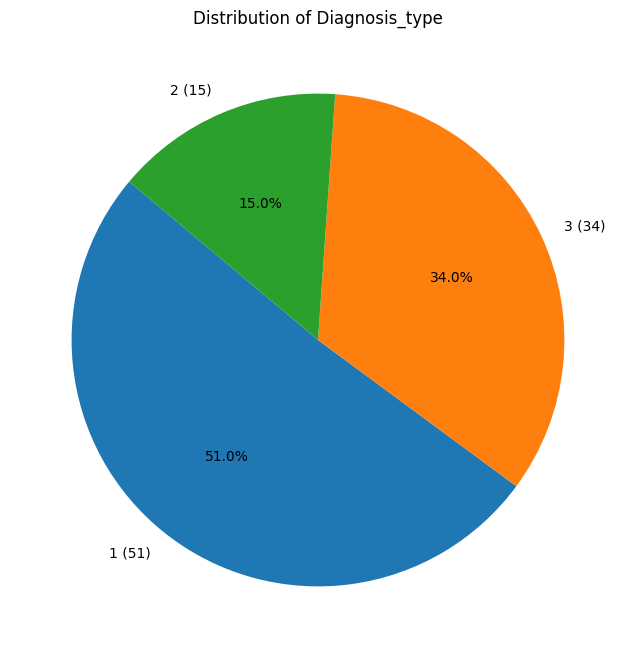

In [19]:
diagnosis_distribution = df['diagnosis_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_distribution, 
        labels=[f"{idx} ({val})" for idx, val in zip(diagnosis_distribution.index, diagnosis_distribution.values)], 
        autopct='%1.1f%%', 
        startangle=140)
plt.title("Distribution of Diagnosis_type")
plt.show()

# continuousÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î∂ÑÌè¨ Ï≤¥ÌÅ¨

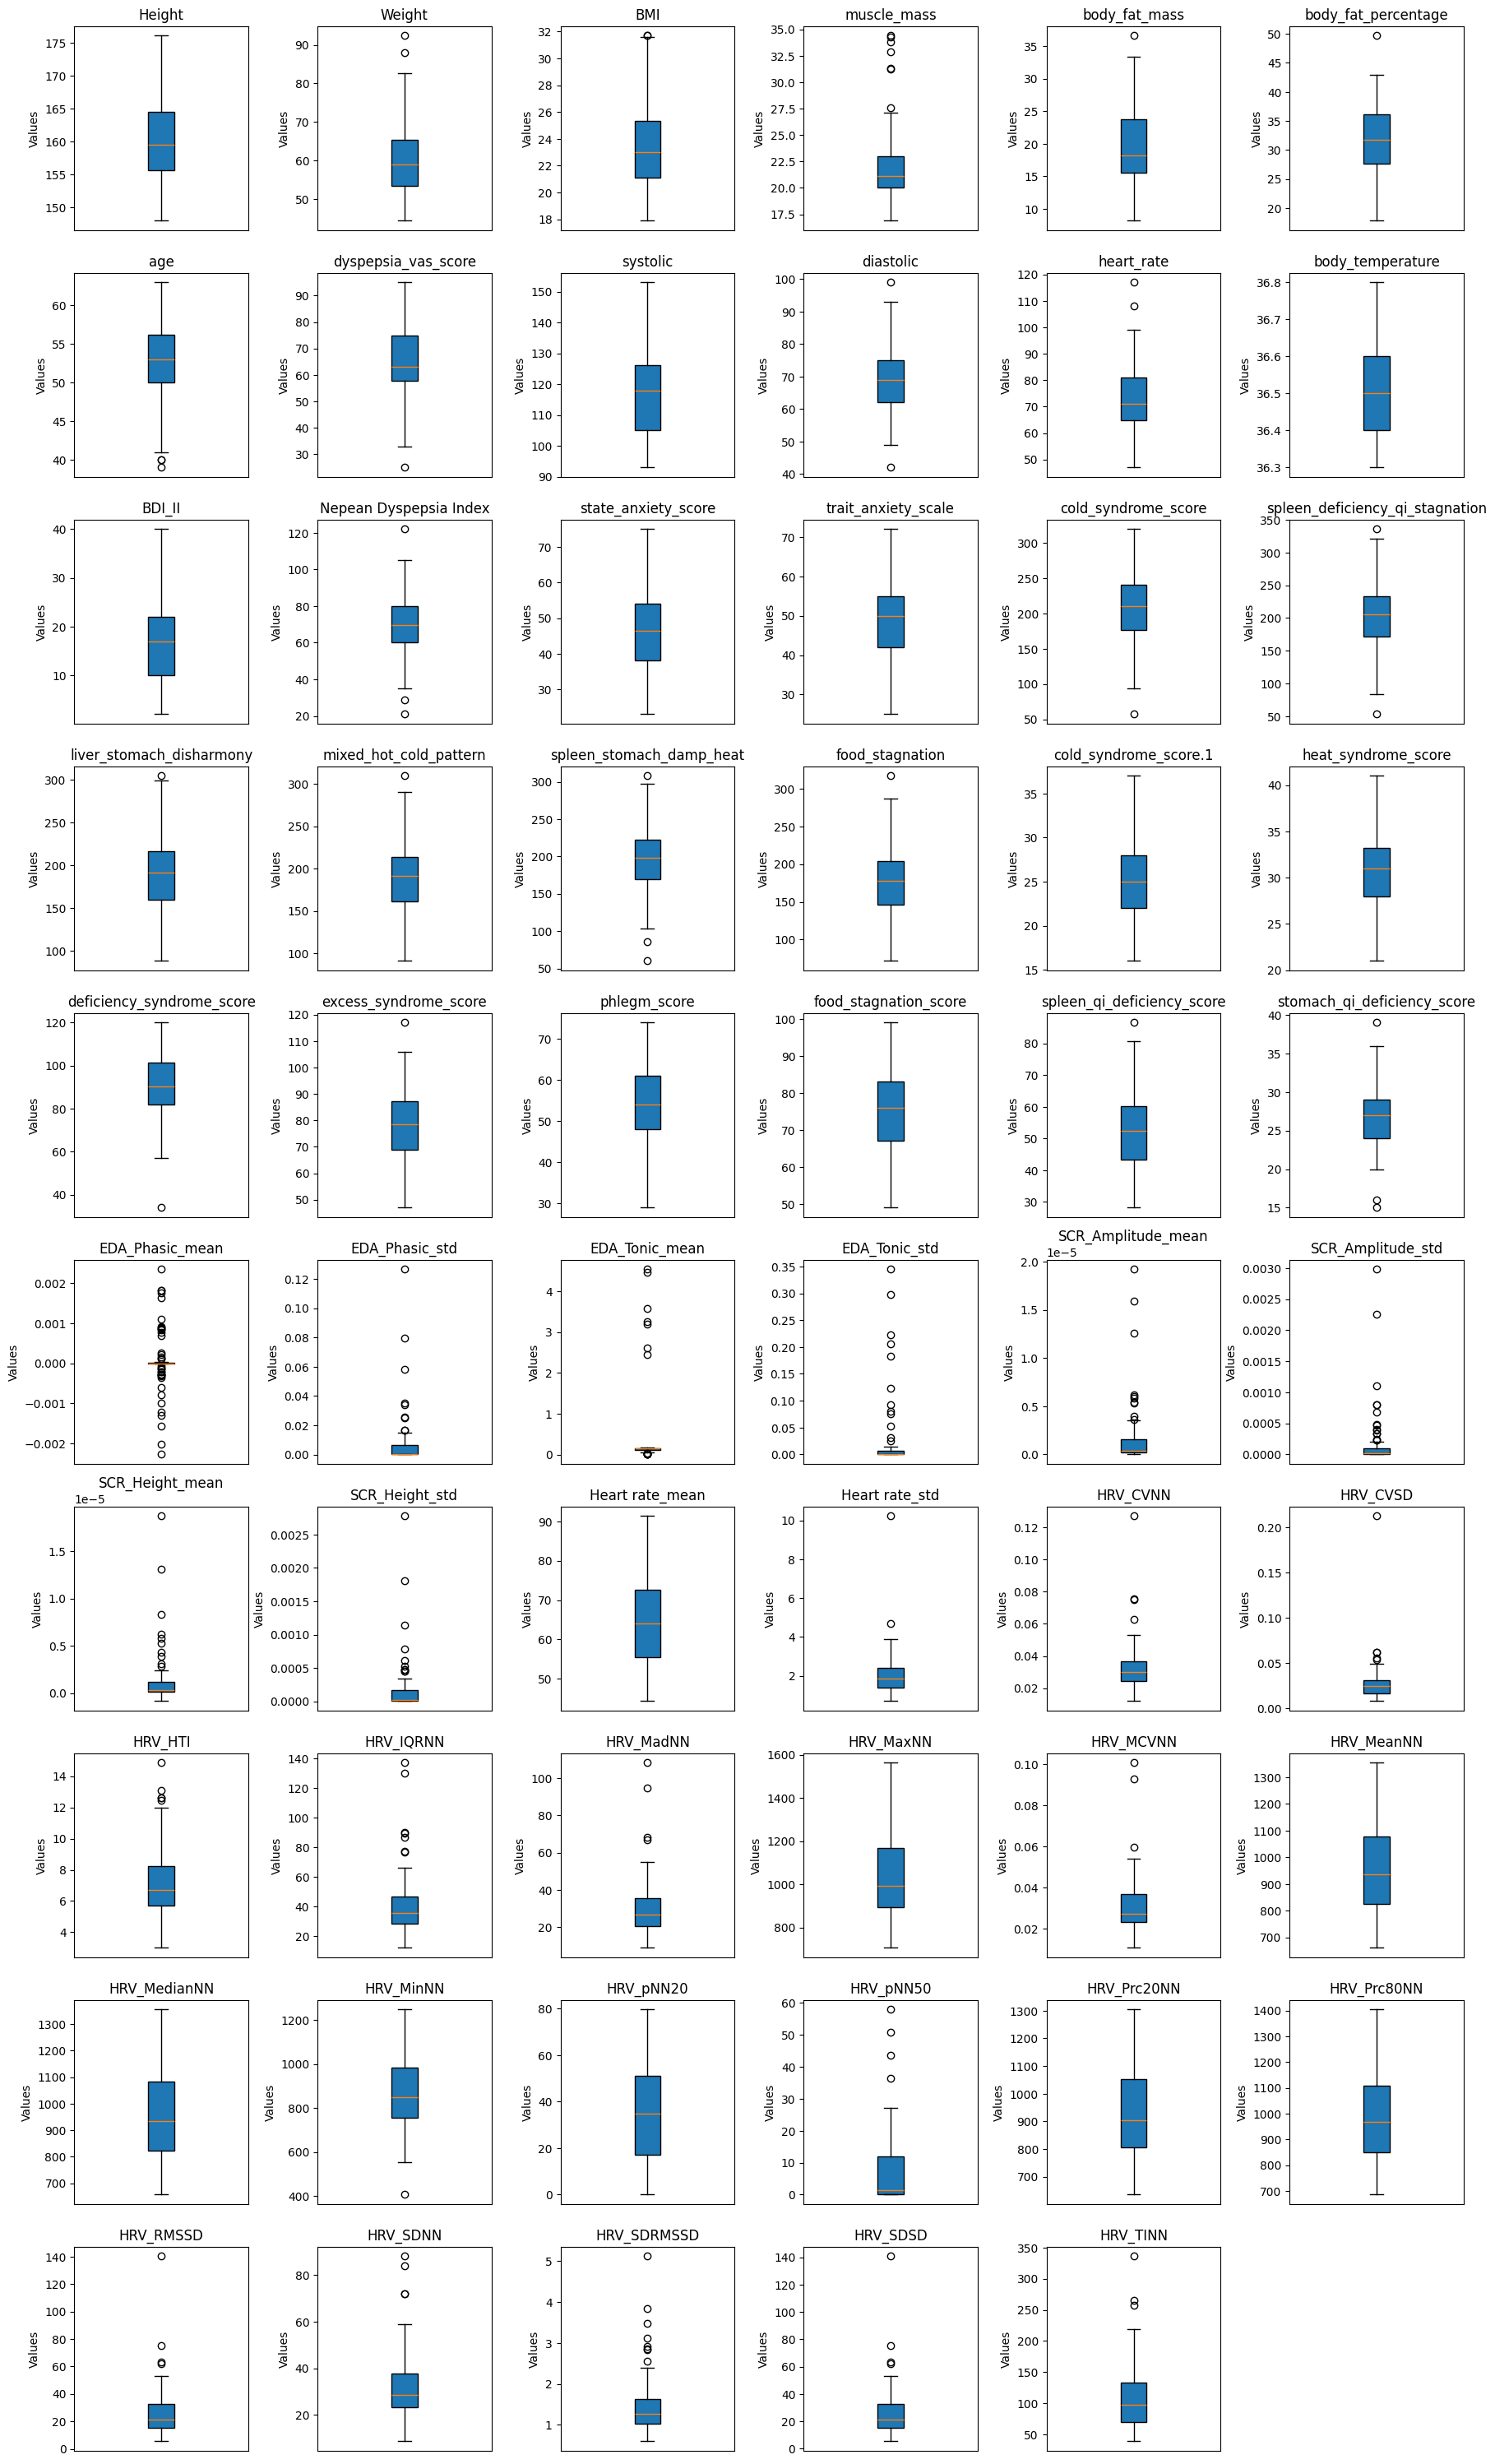

In [5]:
continuous = df.copy()
continuous.drop(columns=['Rome_4_criteria_PDS', 'ed_5q_1', 'ed_5q_2', 'ed_5q_3', 'ed_5q_4', 'ed_5q_5', 'diagnosis', 'diagnosis_type'], inplace=True)
num_vars = len(continuous)
cols = 6
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 3))
axes = axes.flatten()

# Î∞ïÏä§ ÌîåÎ°Ø Í∑∏Î¶¨Í∏∞
for i, column in enumerate(continuous):
    ax = axes[i]
    if column in df.columns:
        ax.boxplot(df[column].dropna(), vert=True, patch_artist=True)
        ax.set_title(f'{column}')
        ax.set_ylabel('Values')
        ax.set_xticks([])
    else:
        ax.set_visible(False)

# ÎÇ®ÏùÄ Îπà ÌîåÎ°Ø Ï†úÍ±∞
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

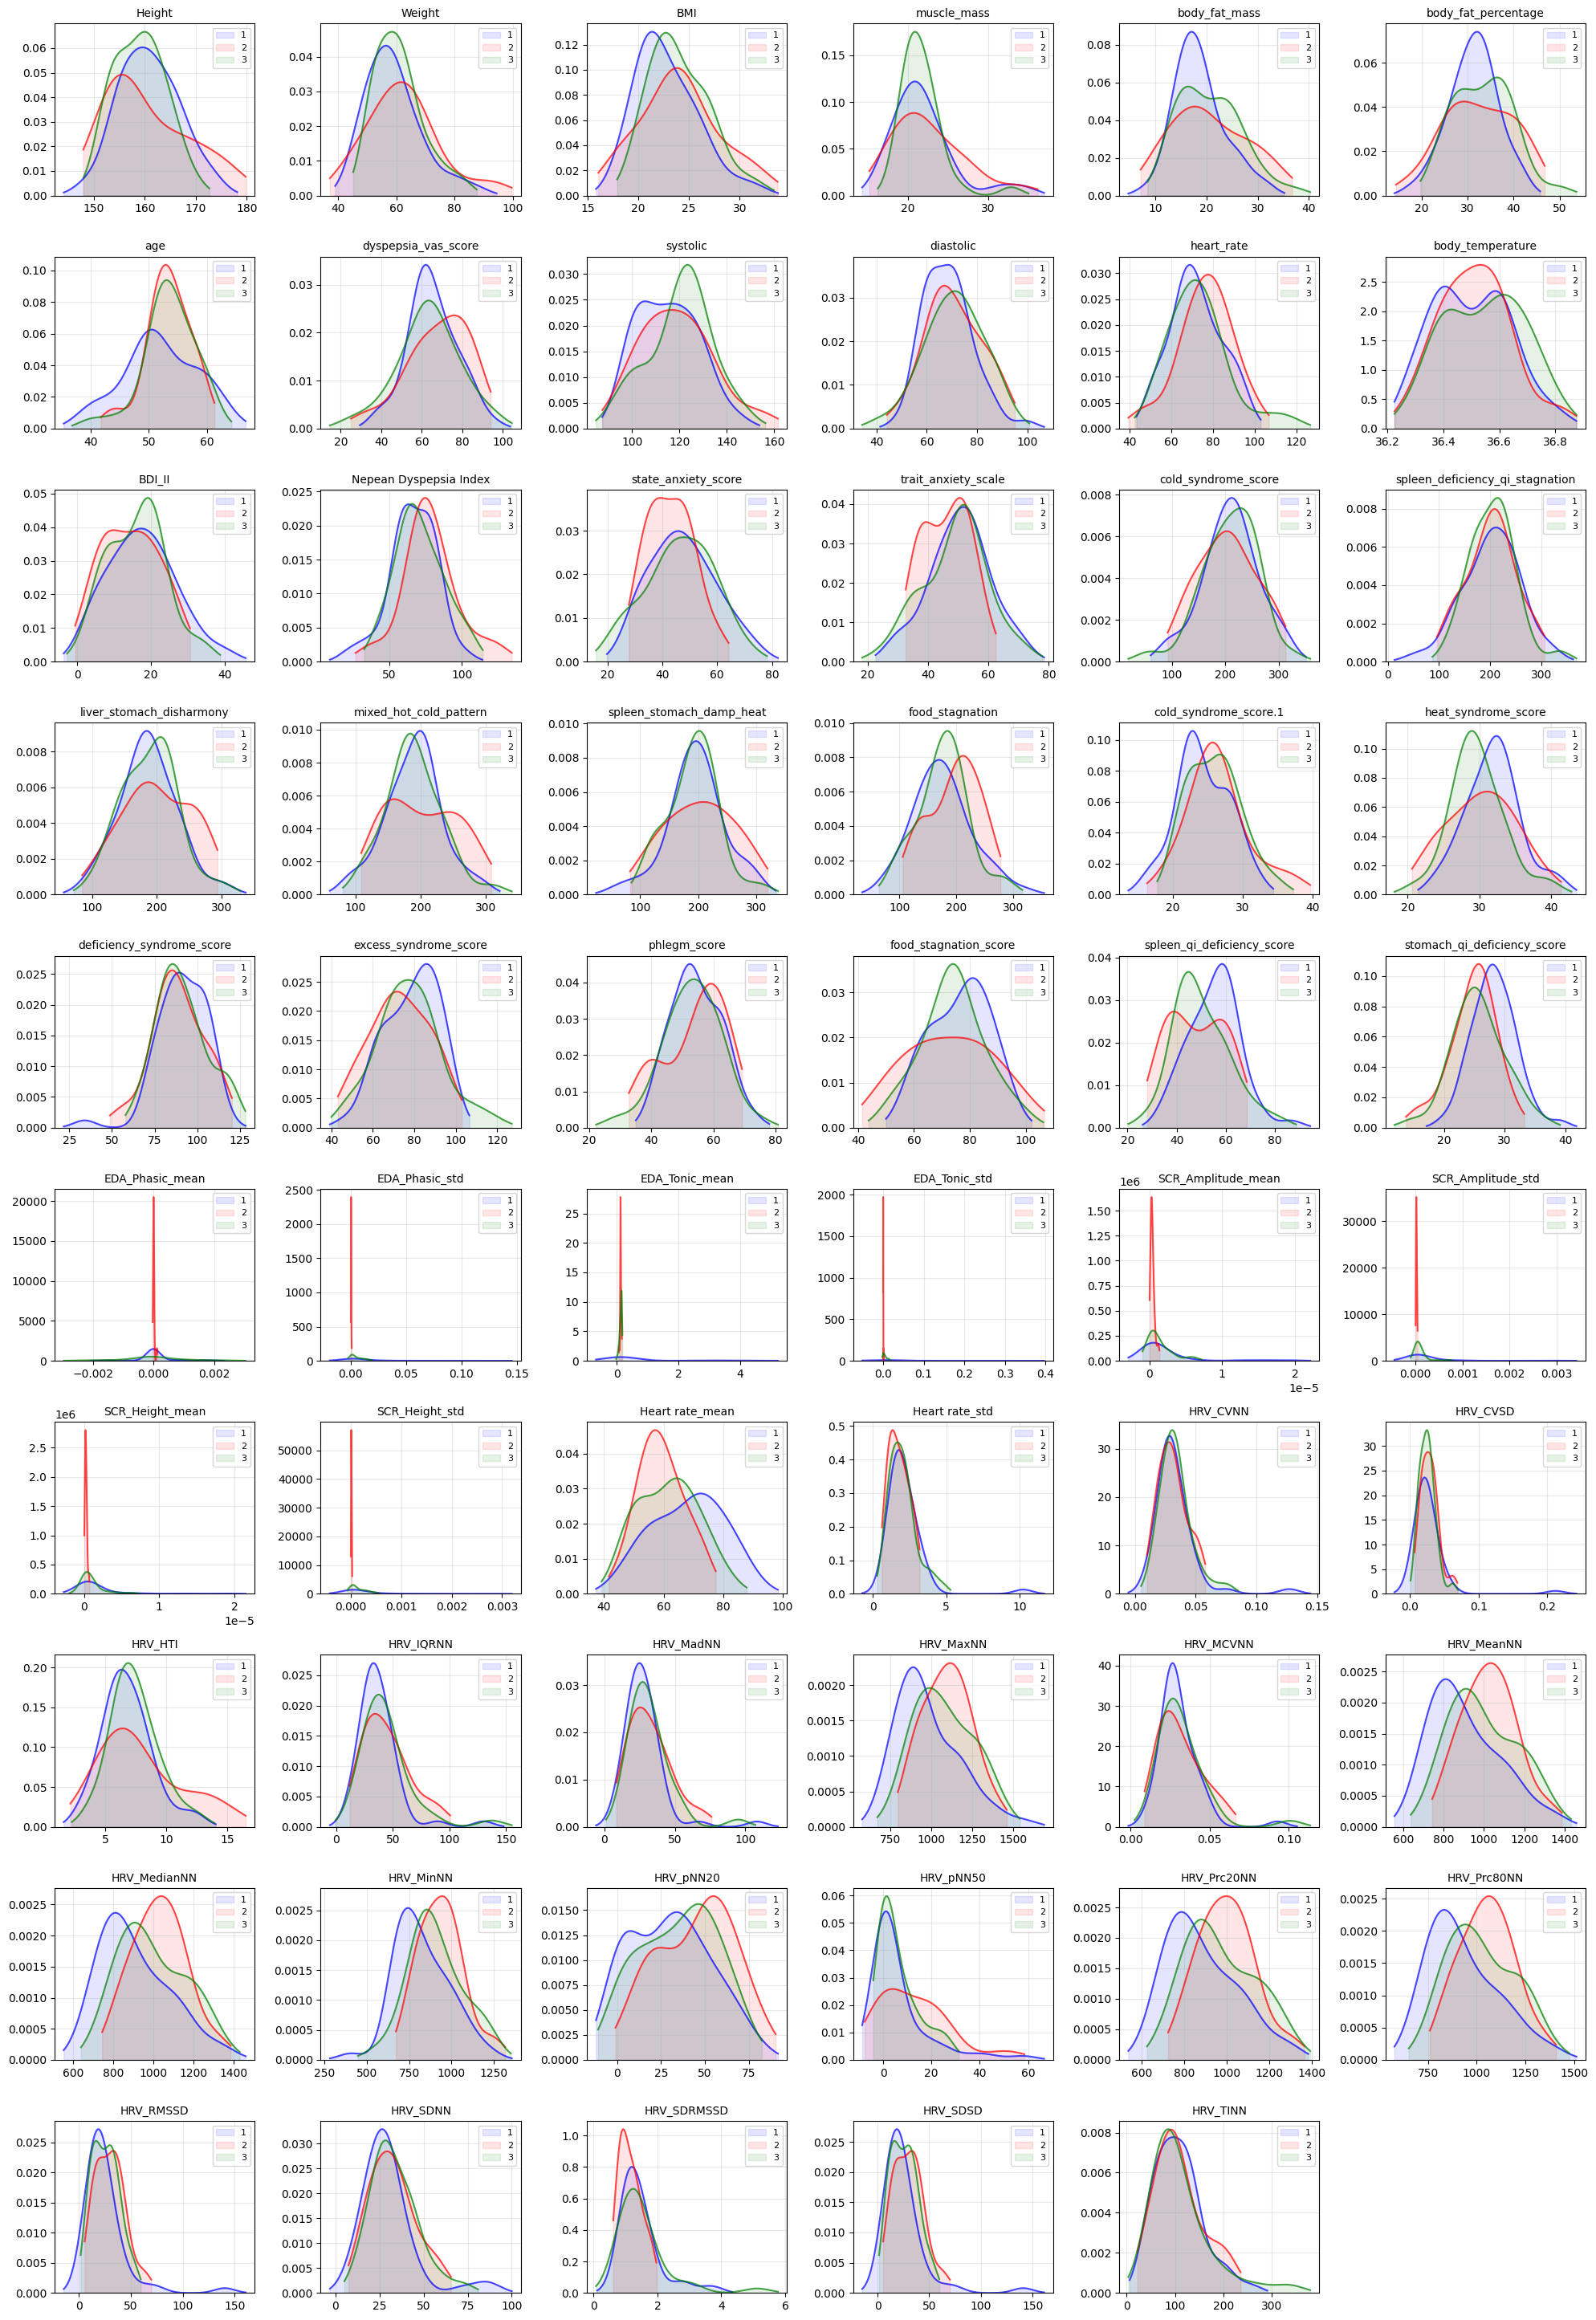

In [6]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# diagnosisÏóê Îî∞Îùº 1, 2, 3ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÎÇòÎàÑÍ∏∞
df_1 = df[df['diagnosis_type'] == 1]
df_2 = df[df['diagnosis_type'] == 2]
df_3 = df[df['diagnosis_type'] == 3]

# xÏ∂ï ÌôïÏû• ÎπÑÏú® Î∞è KDE ÏÉòÌîå Í∞úÏàò ÏÑ§Ï†ï
x_padding_ratio = 0.15  # xÏ∂ïÏùÑ 15% ÌôïÏû•
num_points = 500  # KDE xÏ∂ï ÏÉòÌîå Í∞úÏàò Ï§ÑÏù¥Í∏∞

num_cols = len(continuous.columns)
fig, axes = plt.subplots(nrows=(num_cols // 6 + 1), ncols=6, figsize=(20, num_cols // 2))
axes = axes.flatten()

for i, column in enumerate(continuous.columns):
    ax = axes[i]

    for df_subset, color, label in zip([df_1, df_2, df_3], ['blue', 'red', 'green'], ['1', '2', '3']):
        variable_data = df_subset[column].dropna()

        # xÏ∂ï Î≤îÏúÑ ÌôïÏû• Í≥ÑÏÇ∞
        if len(variable_data) > 0:
            x_min, x_max = variable_data.min(), variable_data.max()
            x_range = x_max - x_min
            x_min -= x_range * x_padding_ratio
            x_max += x_range * x_padding_ratio

            # KDE Ï†ÅÏö© Í∞ÄÎä• Ïó¨Î∂Ä ÌôïÏù∏
            if len(variable_data) >= 5 and variable_data.nunique() > 1:
                kde = gaussian_kde(variable_data)
                x_vals = np.linspace(x_min, x_max, num_points)  # xÏ∂ï ÌôïÏû• Ï†ÅÏö©
                pdf_vals = kde(x_vals)

                
                # Í∑∏ÎûòÌîÑ Ï±ÑÏö∞Í∏∞ Î∞è ÏÑ† Í∑∏Î¶¨Í∏∞
                ax.fill_between(x_vals, pdf_vals, color=color, alpha=0.1, label=label)
                ax.plot(x_vals, pdf_vals, color=color, alpha=0.7)
            else:
                # KDE Ï†ÅÏö©Ïù¥ Î∂àÍ∞ÄÎä•Ìïú Í≤ΩÏö∞ ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÎåÄÏ≤¥
                sns.histplot(variable_data, bins=20, color=color, alpha=0.4, kde=False, label=label, ax=ax)

    ax.set_title(column, fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

    # üîπ yÏ∂ï Ïä§ÏºÄÏùº ÏûêÎèô Ï°∞Ï†ï (ÎÑàÎ¨¥ ÌÅ∞ Í∞í Î∞©ÏßÄ)
    ax.set_ylim(0, None)  

# ÎÇ®ÏùÄ axes ÎπÑÌôúÏÑ±Ìôî
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [7]:
#scaler = StandardScaler()
#continuous_scaled_array = scaler.fit_transform(continuous)
#continuous_scaled = pd.DataFrame(continuous_scaled_array, columns=continuous.columns)

#df.update(continuous_scaled)


In [8]:
df

Height  Weight   BMI  muscle_mass  body_fat_mass  body_fat_percentage  \
0    150.1    46.7  20.7         16.9           14.6                 31.3   
1    159.5    49.4  19.4         19.1           13.2                 26.7   
2    159.3    58.4  23.0         21.1           19.4                 33.2   
3    160.8    60.0  23.2         21.3           20.9                 34.8   
4    153.3    57.4  24.4         20.3           19.4                 33.9   
..     ...     ...   ...          ...            ...                  ...   
95   158.8    65.2  25.9         21.9           24.9                 38.1   
96   151.1    60.4  26.5         19.6           23.8                 39.4   
97   152.6    73.6  31.6         19.8           36.6                 49.7   
98   150.8    51.4  22.6         18.9           16.2                 31.4   
99   165.8    60.3  21.9         23.7           16.4                 27.1   

    age  dyspepsia_vas_score  Rome_4_criteria_PDS  systolic  ...  HRV_pNN50  \
0    58                   65                    2       112  ...        0.0   
1    58                   68                    2        96  ...        0.8   
2    49                   61                    1       117  ...        0.0   
3    53                   64                    2       103  ...        0.0   
4    62                   85                    2       103  ...        0.0   
..  ...                  ...                  ...       ...  ...        ...   
95   55                   93                    2       118  ...        0.0   
96   57                   56                    1       132  ...        0.0   
97   52                   82                    2       126  ...        0.0   
98   56                   72                    1       115  ...        0.0   
99   60                   75                    2       124  ...        0.0   

    HRV_Prc20NN  HRV_Prc80NN  HRV_RMSSD   HRV_SDNN  HRV_SDRMSSD   HRV_SDSD  \
0         726.0        764.0  17.464430  23.677708     1.355768  17.517420   
1         933.8        972.2  20.548330  43.330520     2.108712  20.631677   
2         740.0        757.0   7.599967   9.792497     1.288492   7.623868   
3         870.0        907.0  18.781490  20.609342     1.097322  18.846501   
4         676.0        690.4   5.430592   8.667729     1.596093   5.444862   
..          ...          ...        ...        ...          ...        ...   
95        957.4        980.0   8.560297  13.884949     1.622017   8.588644   
96        714.4        746.6  10.783504  20.403745     1.892126  10.816764   
97        856.8        910.0  13.480223  32.323573     2.397851  13.530806   
98        764.0        809.0  19.915655  26.395615     1.325370  19.977644   
99        868.0        898.0  15.934334  17.414795     1.092910  15.987161   

    HRV_TINN  diagnosis  diagnosis_type  
0   117.1875          1               1  
1   195.3125          1               1  
2    39.0625          1               1  
3    93.7500          1               1  
4    39.0625          1               1  
..       ...        ...             ...  
95   54.6875          6               3  
96   85.9375          6               3  
97   70.3125          6               3  
98  117.1875          6               3  
99   70.3125          6               3  

[100 rows x 67 columns]

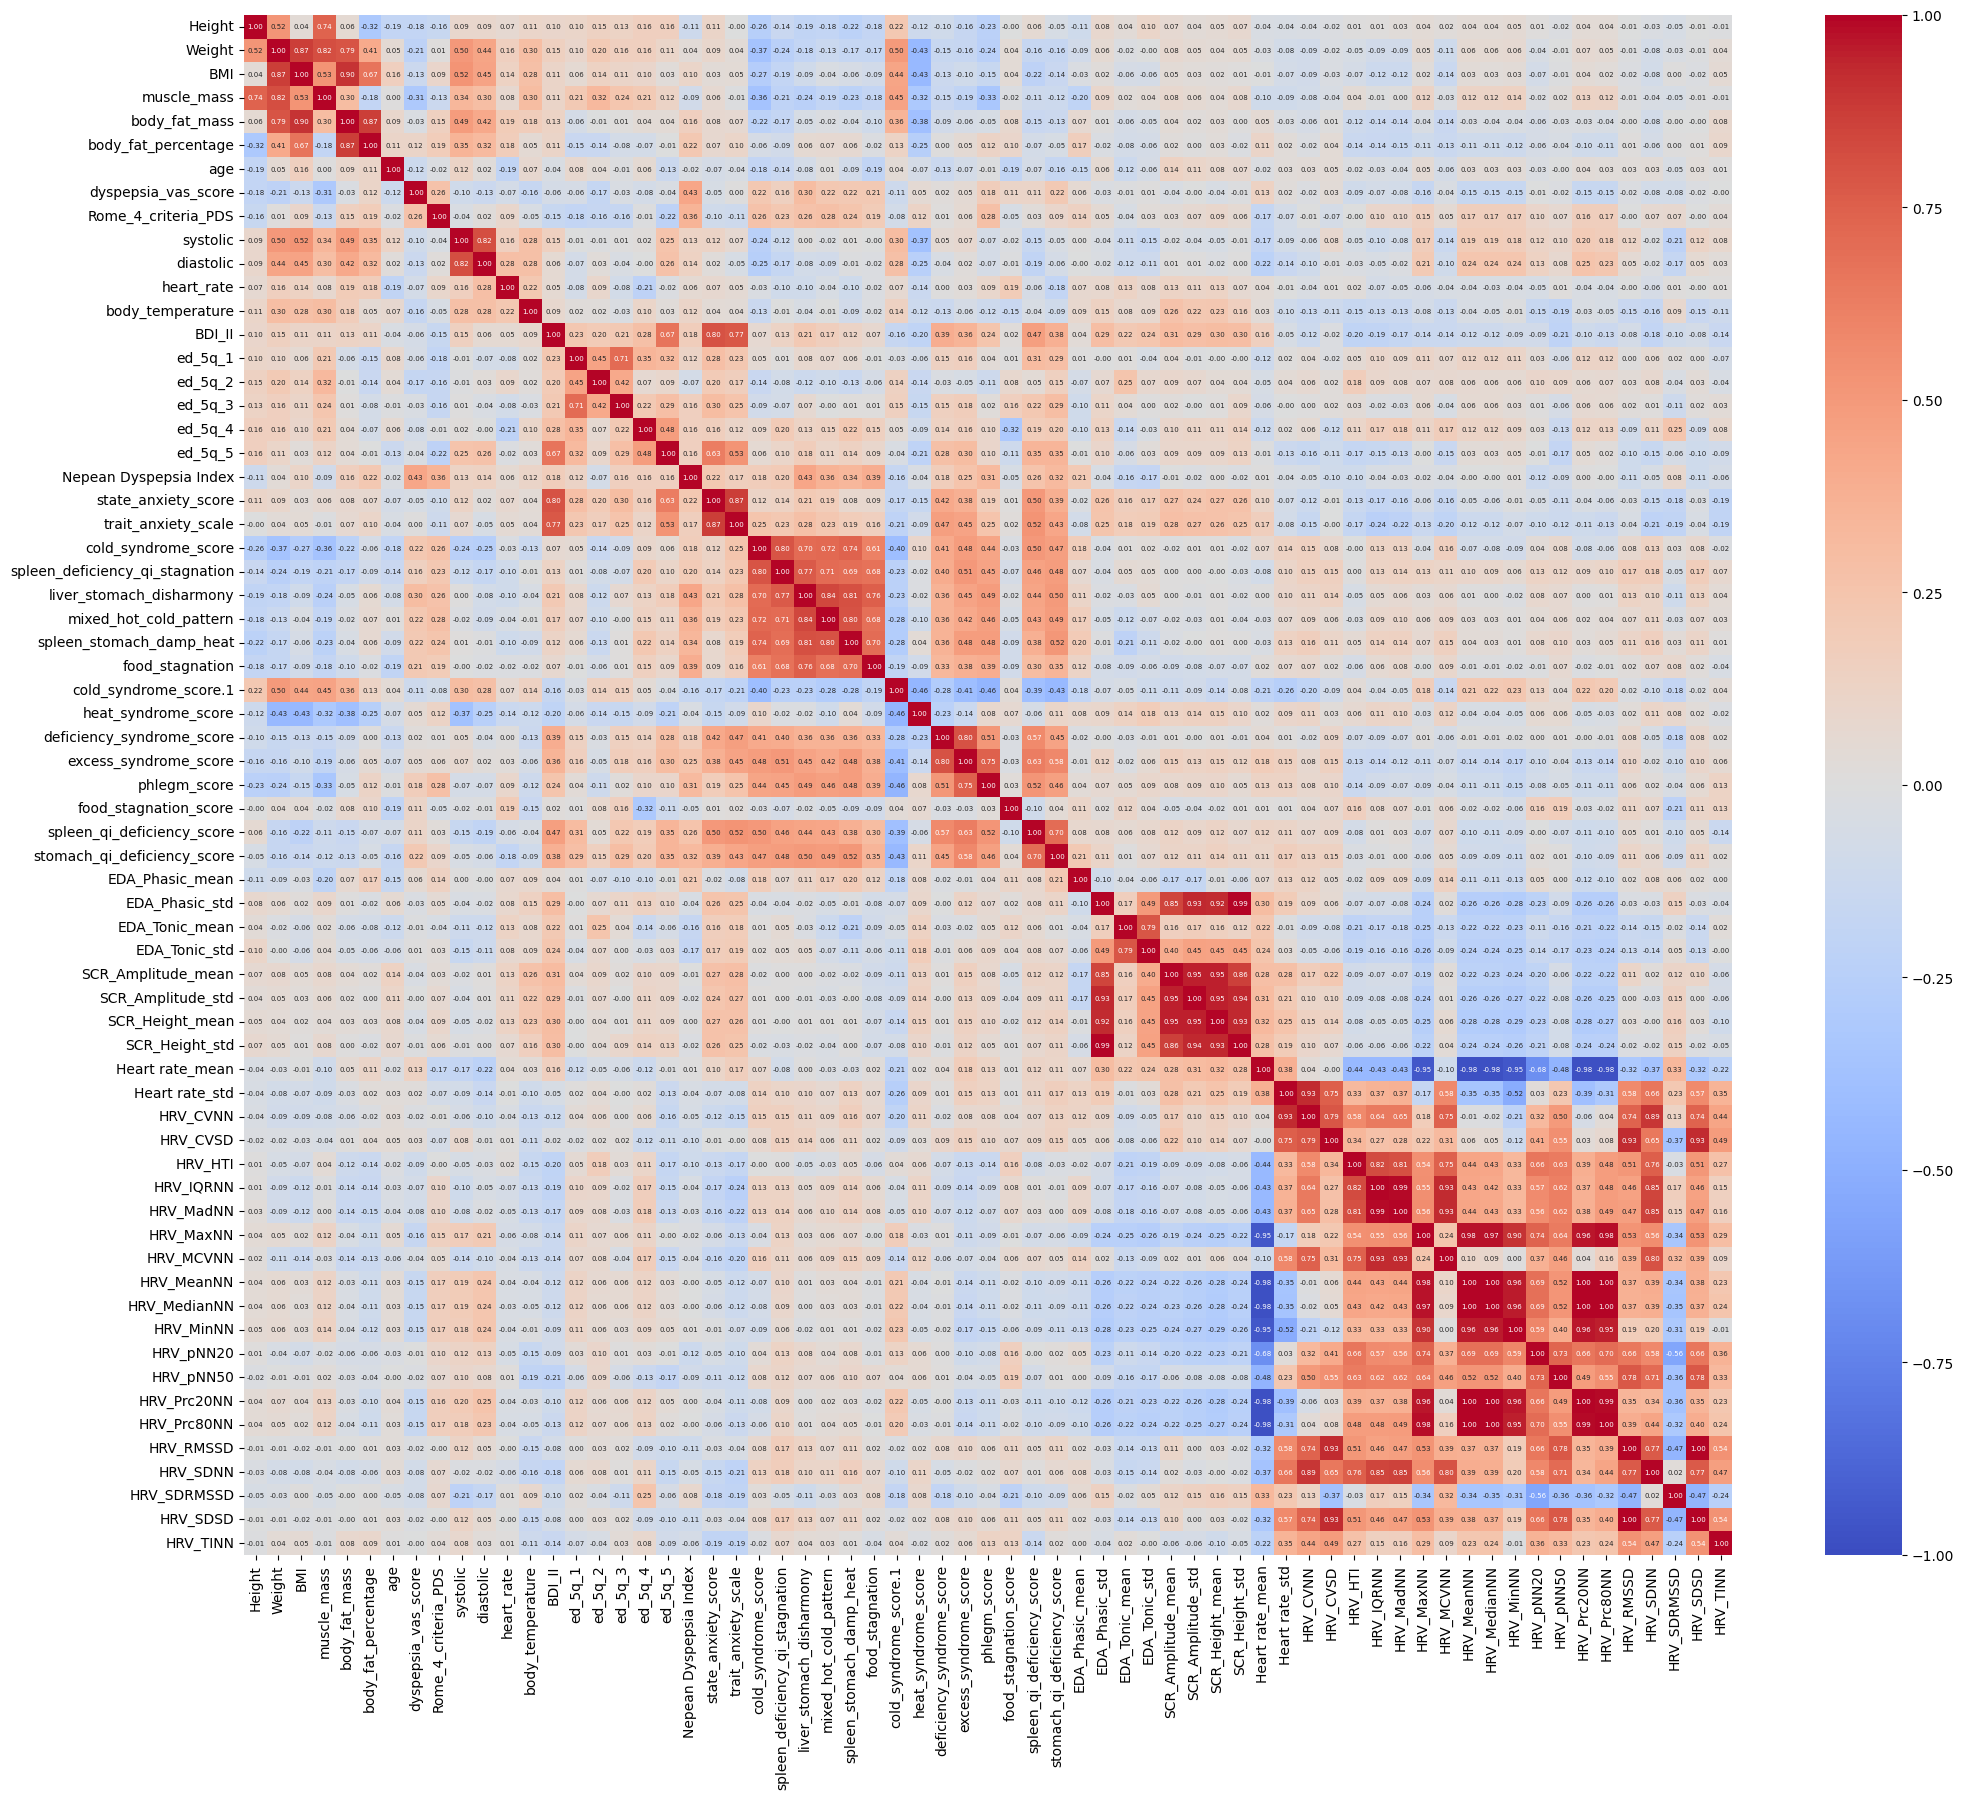

In [9]:
target_1 = df['diagnosis']
target_2 = df['diagnosis_type']
df.drop(columns=['diagnosis', 'diagnosis_type'], inplace=True)

corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 5}, vmin=-1, vmax=1)
plt.show()

In [10]:
t = 0.5

pairs = []
pair_set = set()
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > t:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            c = corr.iloc[i, j]
            if((col1, col2) not in pair_set): #(col1, col2), (col2, col1) ÎëêÎ≤à Îì§Ïñ¥Ïò§Îäî Í±∏ Î∞©ÏßÄ
                pairs.append((col1, col2, c))
                pair_set.add((col1, col2))
pairs.sort()
pairs.sort(key=lambda x: x[2], reverse=True)
pairs

[('HRV_RMSSD', 'HRV_SDSD', np.float64(0.9999984243018598)),
 ('HRV_MeanNN', 'HRV_MedianNN', np.float64(0.9996801803494013)),
 ('HRV_MeanNN', 'HRV_Prc80NN', np.float64(0.9981449334533506)),
 ('HRV_MedianNN', 'HRV_Prc20NN', np.float64(0.9980117238684629)),
 ('HRV_MeanNN', 'HRV_Prc20NN', np.float64(0.9975385112192843)),
 ('HRV_MedianNN', 'HRV_Prc80NN', np.float64(0.9972519908114239)),
 ('EDA_Phasic_std', 'SCR_Height_std', np.float64(0.9923830856205644)),
 ('HRV_Prc20NN', 'HRV_Prc80NN', np.float64(0.9918129788585219)),
 ('HRV_IQRNN', 'HRV_MadNN', np.float64(0.9904601465325552)),
 ('HRV_MaxNN', 'HRV_Prc80NN', np.float64(0.9816413268556143)),
 ('HRV_MaxNN', 'HRV_MeanNN', np.float64(0.9752358633527237)),
 ('HRV_MaxNN', 'HRV_MedianNN', np.float64(0.9723855933923325)),
 ('HRV_MinNN', 'HRV_Prc20NN', np.float64(0.9625133568624287)),
 ('HRV_MaxNN', 'HRV_Prc20NN', np.float64(0.9620957116142161)),
 ('HRV_MeanNN', 'HRV_MinNN', np.float64(0.9590908340289095)),
 ('HRV_MedianNN', 'HRV_MinNN', np.float64

In [11]:
df.drop(columns=['EDA_Phasic_std', 'EDA_Tonic_mean', 'EDA_Tonic_std', 'SCR_Amplitude_mean', 'SCR_Amplitude_std', 'SCR_Height_mean', 'SCR_Height_std'], inplace=True)
df.drop(columns=['Heart rate_std', 'HRV_CVNN', 'HRV_CVSD', 'HRV_HTI', 'HRV_IQRNN', 'HRV_MadNN', 'HRV_MaxNN', 'HRV_MCVNN', 'HRV_MeanNN', 'HRV_MedianNN', 'HRV_MinNN', 'HRV_pNN20', 'HRV_pNN50', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_RMSSD', 'HRV_SDNN', 'HRV_SDRMSSD', 'HRV_SDSD', 'HRV_TINN'], inplace=True)
df.drop(columns=['spleen_deficiency_qi_stagnation', 'liver_stomach_disharmony', 'mixed_hot_cold_pattern', 'spleen_stomach_damp_heat', 'food_stagnation'], inplace=True)
df.drop(columns=['body_fat_mass', 'trait_anxiety_scale', 'body_fat_percentage', 'BMI', 'muscle_mass', 'diastolic'], inplace=True)

columns_to_sum = ["ed_5q_1", "ed_5q_2", "ed_5q_3", "ed_5q_4", "ed_5q_5"]
df["ed_5q"] = df[columns_to_sum].sum(axis=1)
df.drop(columns=columns_to_sum, inplace=True)

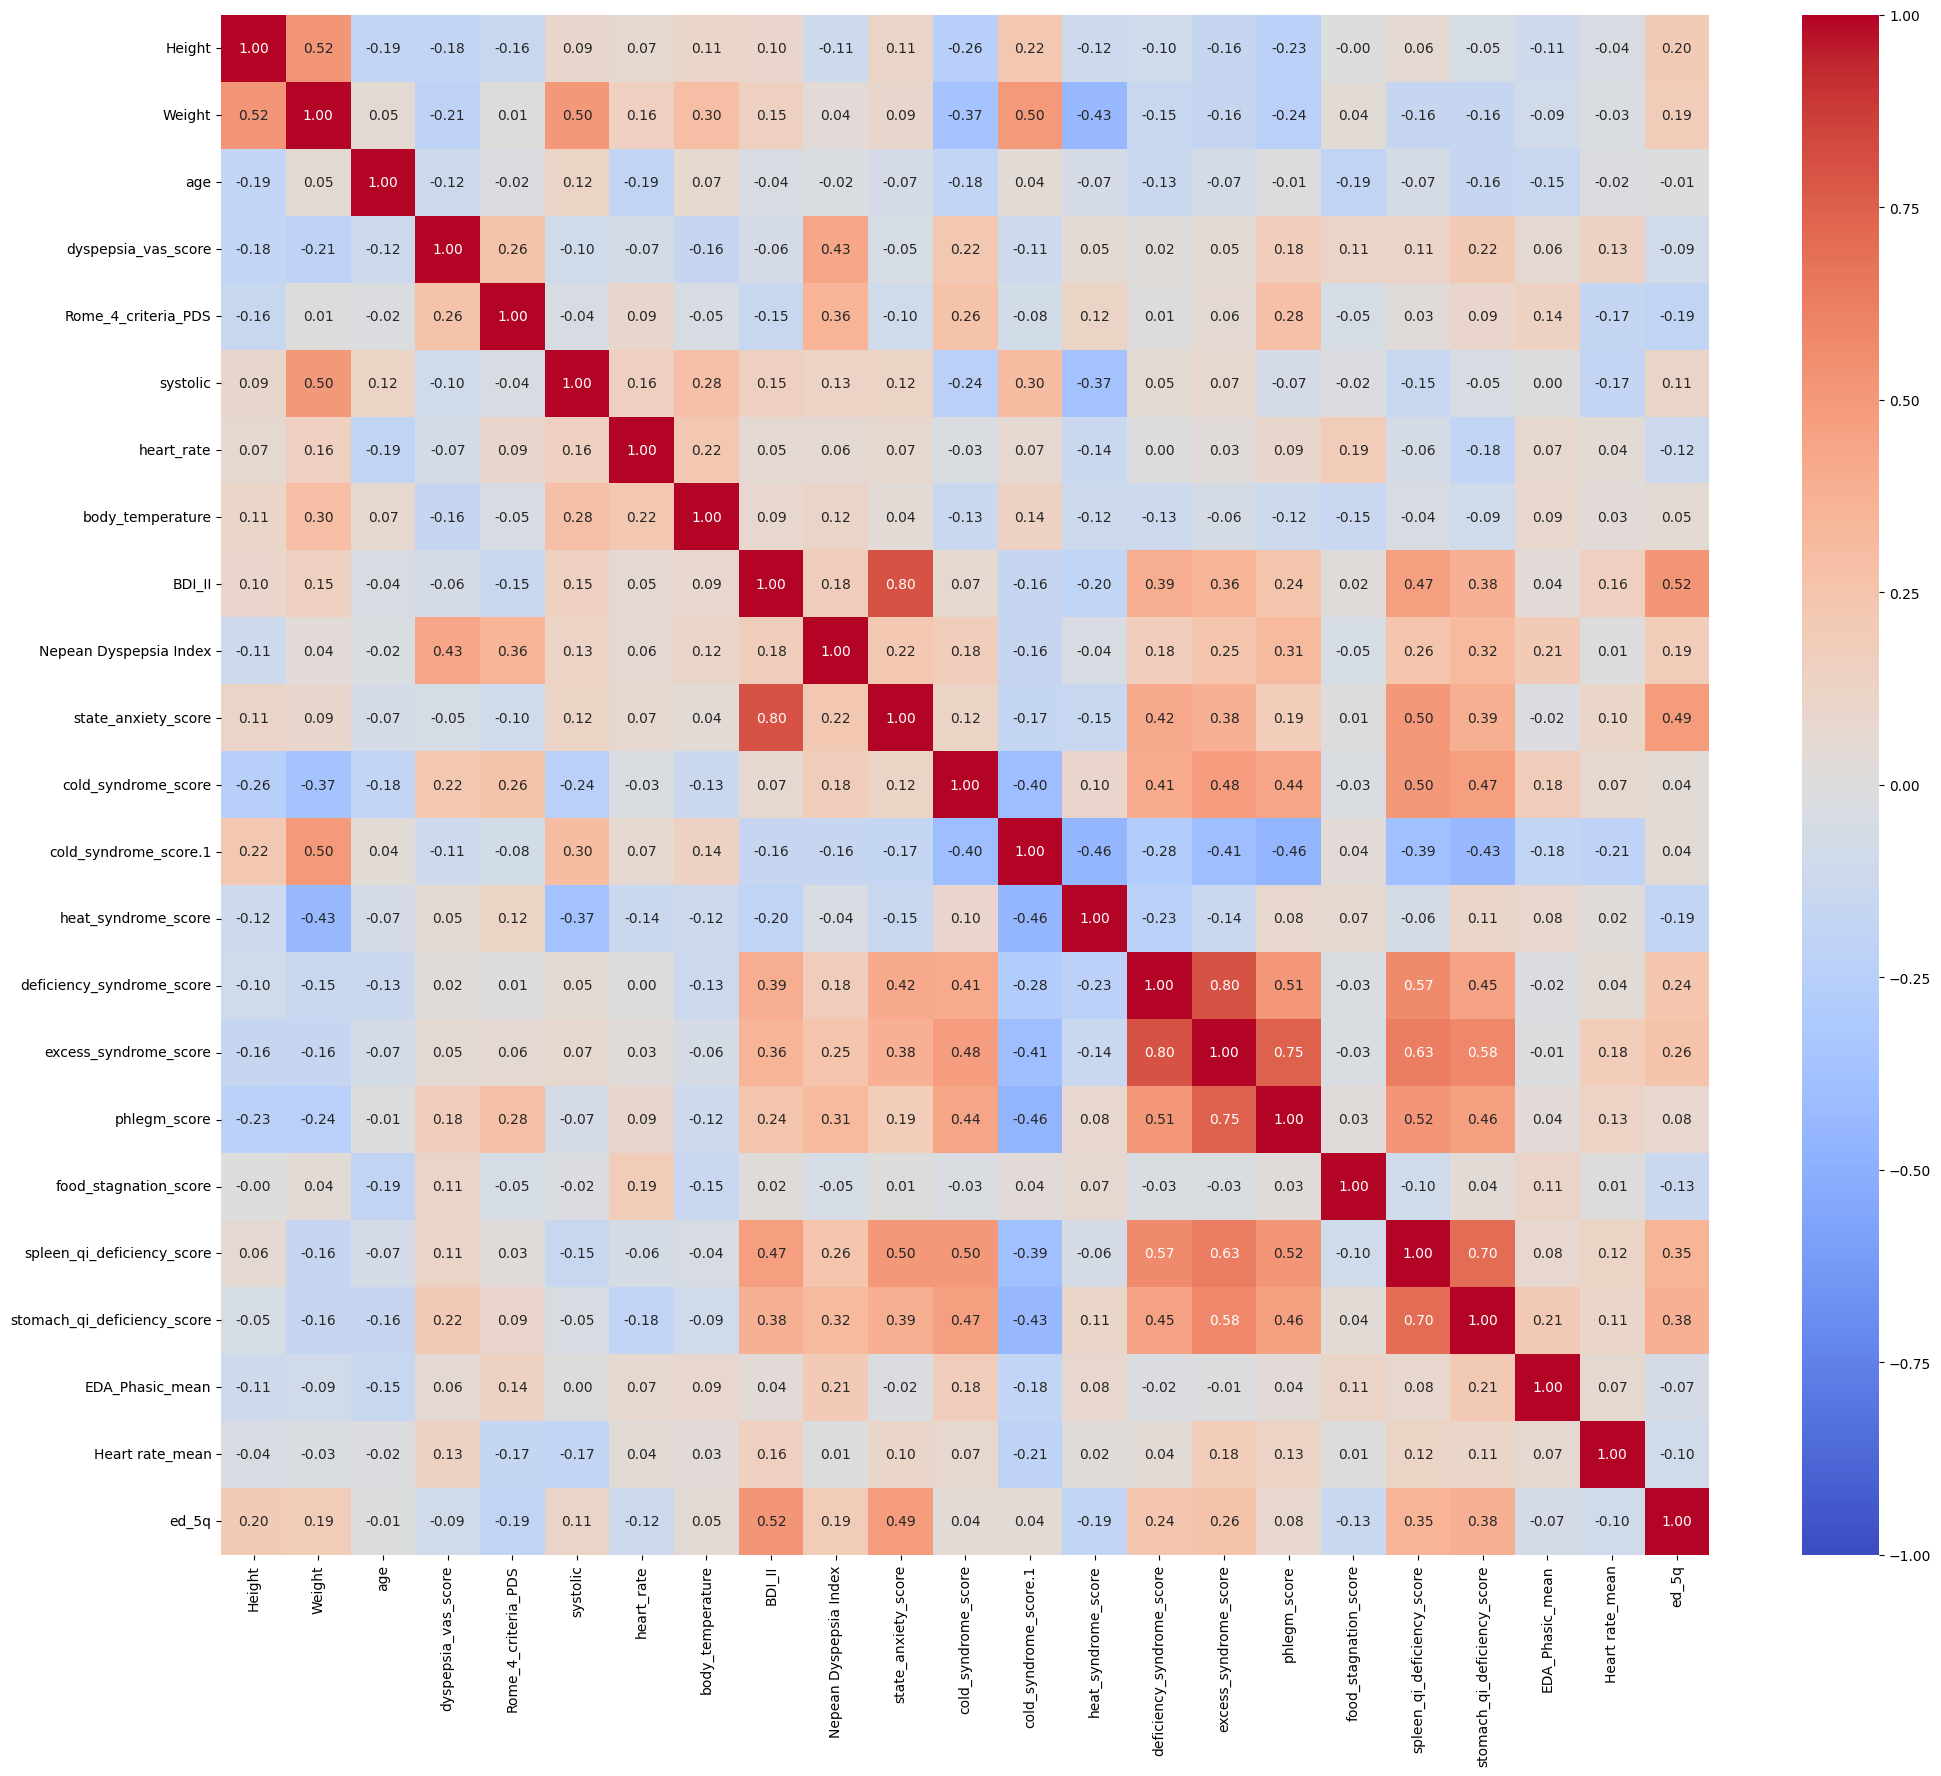

In [12]:
corr = df.corr()
plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.show()

In [13]:
t = 0.5

pairs = []
pair_set = set()
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > t:
            col1 = corr.columns[i]
            col2 = corr.columns[j]
            c = corr.iloc[i, j]
            if((col1, col2) not in pair_set): #(col1, col2), (col2, col1) ÎëêÎ≤à Îì§Ïñ¥Ïò§Îäî Í±∏ Î∞©ÏßÄ
                pairs.append((col1, col2, c))
                pair_set.add((col1, col2))
pairs.sort()
pairs.sort(key=lambda x: x[2], reverse=True)
pairs

[('BDI_II', 'state_anxiety_score', np.float64(0.8041647053150816)),
 ('deficiency_syndrome_score',
  'excess_syndrome_score',
  np.float64(0.7996464666624339)),
 ('excess_syndrome_score', 'phlegm_score', np.float64(0.7465511206649633)),
 ('spleen_qi_deficiency_score',
  'stomach_qi_deficiency_score',
  np.float64(0.695995002280396)),
 ('excess_syndrome_score',
  'spleen_qi_deficiency_score',
  np.float64(0.6288536479601977)),
 ('excess_syndrome_score',
  'stomach_qi_deficiency_score',
  np.float64(0.5826128985208996)),
 ('deficiency_syndrome_score',
  'spleen_qi_deficiency_score',
  np.float64(0.5706669849951236)),
 ('phlegm_score',
  'spleen_qi_deficiency_score',
  np.float64(0.5227256513006296)),
 ('BDI_II', 'ed_5q', np.float64(0.5187458519123425)),
 ('Height', 'Weight', np.float64(0.517472792456088)),
 ('deficiency_syndrome_score', 'phlegm_score', np.float64(0.5149686772086105)),
 ('Weight', 'systolic', np.float64(0.5043845496803475)),
 ('cold_syndrome_score',
  'spleen_qi_deficienc

In [14]:
vif = pd.DataFrame()


vif['VIF_Factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['Feature'] = df.columns

vif = vif.sort_values(by='VIF_Factor', ascending=False)
vif

VIF_Factor                      Feature
7   2452.211548             body_temperature
0   1378.348984                       Height
15   232.306379        excess_syndrome_score
5    154.321032                     systolic
16   145.667839                 phlegm_score
14   145.152255    deficiency_syndrome_score
19   142.479532  stomach_qi_deficiency_score
2    133.250130                          age
1    122.665353                       Weight
13   121.484507          heat_syndrome_score
12   100.789201        cold_syndrome_score.1
18    83.839534   spleen_qi_deficiency_score
10    61.018883          state_anxiety_score
17    55.486198        food_stagnation_score
21    50.124571              Heart rate_mean
6     44.882620                   heart_rate
3     40.263600          dyspepsia_vas_score
11    35.112382          cold_syndrome_score
9     33.038121       Nepean Dyspepsia Index
22    31.946855                        ed_5q
8     18.670040                       BDI_II
4     16.470562          Rome_4_criteria_PDS
20     1.317232              EDA_Phasic_mean

In [15]:
df['diagnosis'] = target_1
df['diagnosis_type'] = target_2

In [16]:
df

Height  Weight  age  dyspepsia_vas_score  Rome_4_criteria_PDS  systolic  \
0    150.1    46.7   58                   65                    2       112   
1    159.5    49.4   58                   68                    2        96   
2    159.3    58.4   49                   61                    1       117   
3    160.8    60.0   53                   64                    2       103   
4    153.3    57.4   62                   85                    2       103   
..     ...     ...  ...                  ...                  ...       ...   
95   158.8    65.2   55                   93                    2       118   
96   151.1    60.4   57                   56                    1       132   
97   152.6    73.6   52                   82                    2       126   
98   150.8    51.4   56                   72                    1       115   
99   165.8    60.3   60                   75                    2       124   

    heart_rate  body_temperature  BDI_II  Nepean Dyspepsia Index  ...  \
0           81              36.5      25                      77  ...   
1           70              36.6       4                      62  ...   
2           93              36.6      29                      63  ...   
3           71              36.4      26                      61  ...   
4           71              36.8      30                      85  ...   
..         ...               ...     ...                     ...  ...   
95          70              36.6       5                     105  ...   
96          83              36.7      23                      62  ...   
97          58              36.6      21                     100  ...   
98          70              36.4      13                      64  ...   
99          74              36.7       6                      87  ...   

    excess_syndrome_score  phlegm_score  food_stagnation_score  \
0                    92.0            65                     87   
1                    47.0            50                     83   
2                    91.0            61                     77   
3                    88.0            62                     67   
4                    89.0            65                     86   
..                    ...           ...                    ...   
95                   50.0            42                     67   
96                   94.0            62                     76   
97                   88.0            64                     51   
98                   90.0            57                     84   
99                   69.0            52                     71   

    spleen_qi_deficiency_score  stomach_qi_deficiency_score  EDA_Phasic_mean  \
0                        54.44                           28    -6.810000e-06   
1                        41.78                           27    -1.516730e-04   
2                        64.60                           24    -1.038780e-04   
3                        63.27                           29     2.613880e-04   
4                        55.94                           28     3.310000e-05   
..                         ...                          ...              ...   
95                       41.31                           27    -1.050000e-05   
96                       58.04                           26    -4.800000e-07   
97                       63.48                           29     3.600000e-06   
98                       45.42                           25     1.260000e-05   
99                       43.42                           26    -6.120000e-06   

    Heart rate_mean  ed_5q  diagnosis  diagnosis_type  
0         80.581928      5          1               1  
1         63.531891      5          1               1  
2         80.101085      5          1               1  
3         67.622235      5          1               1  
4         87.829793      5          1               1  
..              ...    ...        ...             ...  
95        61.899495      5      

In [17]:
df.to_csv('../dataset/dyspepsia_eda.csv')